Dataset provided by:

- Pappalardo et al., (2019) A public data set of spatio-temporal match events in soccer competitions, Nature Scientific Data 6:236, https://www.nature.com/articles/s41597-019-0247-7

- Pappalardo et al. (2019) PlayeRank: Data-driven Performance Evaluation and Player Ranking in Soccer via a Machine Learning Approach. ACM Transactions on Intellingent Systems and Technologies (TIST) 10, 5, Article 59 (September 2019), 27 pages. DOI: https://doi.org/10.1145/3343172

https://www.nature.com/articles/s41597-019-0247-7#Tab1


In [78]:
import pandas as pd
import matplotlib.style as sty
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [5]:
eventsL = pd.read_json(r'C:\Users\modelical\Desktop\Football\events_Spain.json')
eventsL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628659 entries, 0 to 628658
Data columns (total 12 columns):
eventId         628659 non-null int64
subEventName    628659 non-null object
tags            628659 non-null object
playerId        628659 non-null int64
positions       628659 non-null object
matchId         628659 non-null int64
eventName       628659 non-null object
teamId          628659 non-null int64
matchPeriod     628659 non-null object
eventSec        628659 non-null float64
subEventId      628659 non-null object
id              628659 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 57.6+ MB


In [11]:
teams = pd.read_json(r'C:\Users\modelical\Desktop\Football\teams.json')
teams.info()
teams[teams.city == 'Madrid']
#wyIdAtletico = 679

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
city            142 non-null object
name            142 non-null object
wyId            142 non-null int64
officialName    142 non-null object
area            142 non-null object
type            142 non-null object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


,city,name,wyId,officialName,area,type
10,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
14,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [28]:
print(teams[teams.officialName == 'Uruguay'])
IdUruguay = 15670

           city     name   wyId officialName  \
119  Montevideo  Uruguay  15670      Uruguay   

                                                  area      type  
119  {'name': 'Uruguay', 'id': 858, 'alpha3code': '...  national  


In [29]:
players = pd.read_json(r'C:\Users\modelical\Desktop\Football\players.json')
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 14 columns):
passportArea             3603 non-null object
weight                   3603 non-null int64
firstName                3603 non-null object
middleName               3603 non-null object
lastName                 3603 non-null object
currentTeamId            3512 non-null object
birthDate                3603 non-null object
height                   3603 non-null int64
role                     3603 non-null object
birthArea                3603 non-null object
wyId                     3603 non-null int64
foot                     3603 non-null object
shortName                3603 non-null object
currentNationalTeamId    3603 non-null object
dtypes: int64(3), object(11)
memory usage: 394.2+ KB


In [30]:
playersNames = players.filter(items=['wyId', 'shortName'])
playersNames

,wyId,shortName
0,32777,H. Tekin
1,393228,M. Sarr
2,393230,O. Mandanda
3,32793,A. N'Diaye
4,393247,I. Konat\u00e9
...,...,...
3598,120839,A. Ma\u00e2loul
3599,114736,C. C\u00e1ceda
3600,114908,M. Araujo
3601,285583,A. Tagnaouti


In [9]:
eventsWC = pd.read_json(r'C:\Users\modelical\Desktop\Football\events_World_Cup.json')
eventsWC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101759 entries, 0 to 101758
Data columns (total 12 columns):
eventId         101759 non-null int64
subEventName    101759 non-null object
tags            101759 non-null object
playerId        101759 non-null int64
positions       101759 non-null object
matchId         101759 non-null int64
eventName       101759 non-null object
teamId          101759 non-null int64
matchPeriod     101759 non-null object
eventSec        101759 non-null float64
subEventId      101759 non-null object
id              101759 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 9.3+ MB


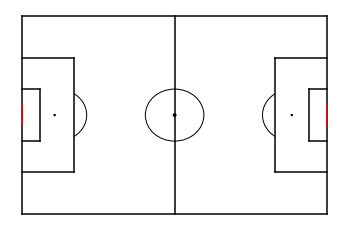

In [79]:
#104x76m pitch
xr = 1.04
yr = 0.76

fig=plt.figure()
#fig,ax = plt.subplots(figsize=(10.4,7.6))
ax=fig.add_subplot(1,1,1)
ax.axis('off')

plt.plot([0,104],[0,0],color="black")
plt.plot([0,0],[76,0],color="black")
plt.plot([0,104],[76,76],color="black")
plt.plot([104,104],[76,0],color="black")
plt.plot([52,52],[0,76],color="black")

plt.plot([104,86.32],[60,60],color="black")
plt.plot([86.32,104],[16,16],color="black")
plt.plot([86.32,86.32],[60,16],color="black")
plt.plot([104,97.97],[48,48],color="black")
plt.plot([104,97.97],[27.968,27.968],color="black")
plt.plot([97.97,97.97],[48,27.968],color="black")

plt.plot([0,17.68],[60,60],color='black')
plt.plot([0,17.68],[16,16],color='black')
plt.plot([17.68,17.68],[16,60],color='black')
plt.plot([0,6.03],[48,48],color='black')
plt.plot([0,6.03],[27.968,27.968],color='black')
plt.plot([6.03,6.03],[48,27.968],color='black')

plt.plot([104,104],[34,42],color="red")
plt.plot([0,0],[34,42],color='red')

penaltySpot = plt.Circle((92.04,38),0.25,color="black")
penaltySpotDF = plt.Circle((11,38),0.25,color='black')
centreSpot = plt.Circle((52,38),0.5,color="black")
centreCircle = plt.Circle((52,38),10,color="black",fill=False)

D = Arc((92.04,38),height=20,width=20,angle=0,theta1=125,theta2=235,color="black")
E = Arc((11.96,38),height=20,width=20,angle=0,theta1=305,theta2=55,color="black")

ax.add_patch(centreSpot)
ax.add_patch(centreCircle)
ax.add_patch(penaltySpot)
ax.add_patch(penaltySpotDF)
ax.add_patch(D)
ax.add_patch(E)

pitch = plt

pitch.show()

In [111]:
eventsWCTeam = eventsWC[eventsWC.teamId == IdUruguay]
eventsWCTeam

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1589,8,Simple pass,[{'id': 1801}],21174,"[{'y': 50, 'x': 47}, {'y': 73, 'x': 26}]",2057955,Pass,15670,1H,3.406320,85,258688250
1590,8,High pass,[{'id': 1802}],227894,"[{'y': 73, 'x': 26}, {'y': 95, 'x': 66}]",2057955,Pass,15670,1H,6.433663,83,258688252
1592,8,Simple pass,"[{'id': 1401}, {'id': 1802}]",116349,"[{'y': 84, 'x': 59}, {'y': 95, 'x': 54}]",2057955,Pass,15670,1H,11.489572,85,258688256
1594,1,Ground defending duel,"[{'id': 703}, {'id': 1801}]",116349,"[{'y': 85, 'x': 47}, {'y': 39, 'x': 21}]",2057955,Duel,15670,1H,13.769340,12,258688258
1596,8,Simple pass,[{'id': 1801}],3433,"[{'y': 39, 'x': 21}, {'y': 79, 'x': 37}]",2057955,Pass,15670,1H,20.694661,85,258688260
...,...,...,...,...,...,...,...,...,...,...,...,...
89940,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",70095,"[{'y': 14, 'x': 71}, {'y': 17, 'x': 71}]",2058010,Duel,15670,2H,2966.917402,11,262103969
89941,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",70095,"[{'y': 17, 'x': 71}, {'y': 68, 'x': 90}]",2058010,Pass,15670,2H,2969.048795,80,262103970
89943,8,Simple pass,[{'id': 1801}],70379,"[{'y': 97, 'x': 75}, {'y': 94, 'x': 92}]",2058010,Pass,15670,2H,2975.192067,85,262103972
89944,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",116349,"[{'y': 94, 'x': 92}, {'y': 95, 'x': 97}]",2058010,Duel,15670,2H,2977.768862,11,262103974


In [113]:
eventsWCTeam.subEventName.unique()

array(['Simple pass', 'High pass', 'Ground defending duel', 'Touch',
       'Smart pass', 'Throw in', 'Head pass', 'Ground attacking duel',
       'Ground loose ball duel', 'Acceleration', 'Air duel', 'Clearance',
       'Cross', 'Shot', 'Goal kick', 'Foul', 'Save attempt', 'Hand pass',
       'Corner', 'Goalkeeper leaving line', 'Free Kick', 'Free kick shot',
       'Launch', 'Free kick cross', '', 'Hand foul', 'Reflexes',
       'Out of game foul'], dtype=object)

In [60]:
passesWCTeam = eventsWCTeam[eventsWCTeam.eventName == 'Pass']
passesWCTeam

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1589,8,Simple pass,[{'id': 1801}],21174,"[{'y': 50, 'x': 47}, {'y': 73, 'x': 26}]",2057955,Pass,15670,1H,3.406320,85,258688250
1590,8,High pass,[{'id': 1802}],227894,"[{'y': 73, 'x': 26}, {'y': 95, 'x': 66}]",2057955,Pass,15670,1H,6.433663,83,258688252
1592,8,Simple pass,"[{'id': 1401}, {'id': 1802}]",116349,"[{'y': 84, 'x': 59}, {'y': 95, 'x': 54}]",2057955,Pass,15670,1H,11.489572,85,258688256
1596,8,Simple pass,[{'id': 1801}],3433,"[{'y': 39, 'x': 21}, {'y': 79, 'x': 37}]",2057955,Pass,15670,1H,20.694661,85,258688260
1597,8,Simple pass,[{'id': 1801}],116349,"[{'y': 79, 'x': 37}, {'y': 40, 'x': 25}]",2057955,Pass,15670,1H,22.173712,85,258688262
...,...,...,...,...,...,...,...,...,...,...,...,...
89936,8,High pass,[{'id': 1801}],116269,"[{'y': 23, 'x': 38}, {'y': 37, 'x': 73}]",2058010,Pass,15670,2H,2959.115772,83,262103961
89939,8,Simple pass,[{'id': 1801}],70379,"[{'y': 68, 'x': 70}, {'y': 14, 'x': 71}]",2058010,Pass,15670,2H,2963.345908,85,262103965
89941,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",70095,"[{'y': 17, 'x': 71}, {'y': 68, 'x': 90}]",2058010,Pass,15670,2H,2969.048795,80,262103970
89943,8,Simple pass,[{'id': 1801}],70379,"[{'y': 97, 'x': 75}, {'y': 94, 'x': 92}]",2058010,Pass,15670,2H,2975.192067,85,262103972


In [33]:
TeamPassesNames = passesWCTeam.join(playersNames.set_index('wyId'), on='playerId')
TeamPassesNames

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,shortName
1589,8,Simple pass,[{'id': 1801}],21174,"[{'y': 50, 'x': 47}, {'y': 73, 'x': 26}]",2057955,Pass,15670,1H,3.406320,85,258688250,E. Cavani
1590,8,High pass,[{'id': 1802}],227894,"[{'y': 73, 'x': 26}, {'y': 95, 'x': 66}]",2057955,Pass,15670,1H,6.433663,83,258688252,J. Gim\u00e9nez
1592,8,Simple pass,"[{'id': 1401}, {'id': 1802}]",116349,"[{'y': 84, 'x': 59}, {'y': 95, 'x': 54}]",2057955,Pass,15670,1H,11.489572,85,258688256,M. Vecino
1596,8,Simple pass,[{'id': 1801}],3433,"[{'y': 39, 'x': 21}, {'y': 79, 'x': 37}]",2057955,Pass,15670,1H,20.694661,85,258688260,D. God\u00edn
1597,8,Simple pass,[{'id': 1801}],116349,"[{'y': 79, 'x': 37}, {'y': 40, 'x': 25}]",2057955,Pass,15670,1H,22.173712,85,258688262,M. Vecino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89936,8,High pass,[{'id': 1801}],116269,"[{'y': 23, 'x': 38}, {'y': 37, 'x': 73}]",2058010,Pass,15670,2H,2959.115772,83,262103961,D. Laxalt
89939,8,Simple pass,[{'id': 1801}],70379,"[{'y': 68, 'x': 70}, {'y': 14, 'x': 71}]",2058010,Pass,15670,2H,2963.345908,85,262103965,J. Urretavizcaya
89941,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",70095,"[{'y': 17, 'x': 71}, {'y': 68, 'x': 90}]",2058010,Pass,15670,2H,2969.048795,80,262103970,C. Rodr\u00edguez
89943,8,Simple pass,[{'id': 1801}],70379,"[{'y': 97, 'x': 75}, {'y': 94, 'x': 92}]",2058010,Pass,15670,2H,2975.192067,85,262103972,J. Urretavizcaya


In [61]:
passesWCTeamNames = passesWCTeam.join(playersNames.set_index('wyId'), on='playerId')
PlayerPasses = passesWCTeamNames[passesWCTeamNames.shortName == 'E. Cavani']
PlayerPasses

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,shortName
1589,8,Simple pass,[{'id': 1801}],21174,"[{'y': 50, 'x': 47}, {'y': 73, 'x': 26}]",2057955,Pass,15670,1H,3.406320,85,258688250,E. Cavani
1691,8,Simple pass,[{'id': 1801}],21174,"[{'y': 31, 'x': 46}, {'y': 7, 'x': 54}]",2057955,Pass,15670,1H,304.493945,85,258686239,E. Cavani
1732,8,Simple pass,[{'id': 1801}],21174,"[{'y': 26, 'x': 75}, {'y': 27, 'x': 62}]",2057955,Pass,15670,1H,398.494059,85,258686278,E. Cavani
1734,8,Cross,"[{'id': 402}, {'id': 801}, {'id': 1802}]",21174,"[{'y': 5, 'x': 74}, {'y': 38, 'x': 85}]",2057955,Pass,15670,1H,403.777099,80,258686282,E. Cavani
1846,8,Simple pass,[{'id': 1801}],21174,"[{'y': 38, 'x': 40}, {'y': 95, 'x': 29}]",2057955,Pass,15670,1H,760.775506,85,258686396,E. Cavani
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74986,8,Simple pass,[{'id': 1801}],21174,"[{'y': 10, 'x': 24}, {'y': 23, 'x': 29}]",2058002,Pass,15670,1H,1780.024426,85,261094880,E. Cavani
75075,8,Head pass,[{'id': 1802}],21174,"[{'y': 3, 'x': 60}, {'y': 8, 'x': 62}]",2058002,Pass,15670,1H,2118.200939,82,261095021,E. Cavani
75248,8,Simple pass,[{'id': 1801}],21174,"[{'y': 51, 'x': 51}, {'y': 52, 'x': 35}]",2058002,Pass,15670,2H,1.420648,85,261095207,E. Cavani
75436,8,Simple pass,[{'id': 1801}],21174,"[{'y': 21, 'x': 53}, {'y': 17, 'x': 46}]",2058002,Pass,15670,2H,632.300424,85,261095476,E. Cavani


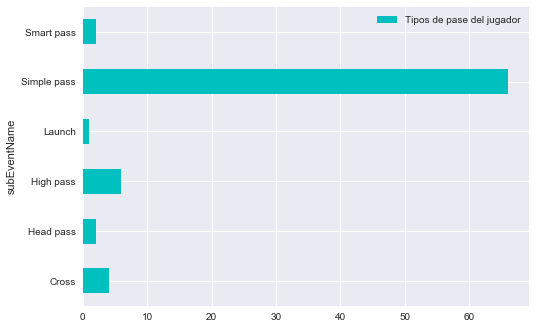

In [118]:
pp = PlayerPasses.groupby('subEventName').subEventName.count()
pp.plot.barh(rot=0, color='c', label='Tipos de pase del jugador')
plt.legend()

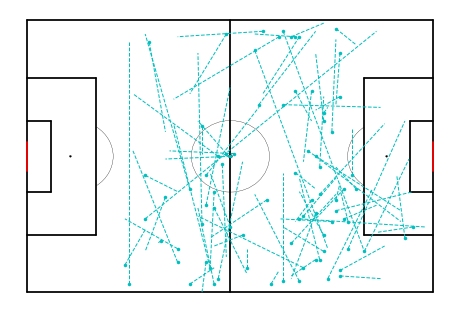

In [110]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

fig=plt.figure()
#fig,ax = plt.subplots(figsize=(10.4,7.6))
ax=fig.add_subplot(1,1,1)
ax.axis('off')

plt.plot([0,104],[0,0],color="black")
plt.plot([0,0],[76,0],color="black")
plt.plot([0,104],[76,76],color="black")
plt.plot([104,104],[76,0],color="black")
plt.plot([52,52],[0,76],color="black")

plt.plot([104,86.32],[60,60],color="black")
plt.plot([86.32,104],[16,16],color="black")
plt.plot([86.32,86.32],[60,16],color="black")
plt.plot([104,97.97],[48,48],color="black")
plt.plot([104,97.97],[27.968,27.968],color="black")
plt.plot([97.97,97.97],[48,27.968],color="black")

plt.plot([0,17.68],[60,60],color='black')
plt.plot([0,17.68],[16,16],color='black')
plt.plot([17.68,17.68],[16,60],color='black')
plt.plot([0,6.03],[48,48],color='black')
plt.plot([0,6.03],[27.968,27.968],color='black')
plt.plot([6.03,6.03],[48,27.968],color='black')

plt.plot([104,104],[34,42],color="red")
plt.plot([0,0],[34,42],color='red')

penaltySpot = plt.Circle((92.04,38),0.25,color="black")
penaltySpotDF = plt.Circle((11,38),0.25,color='black')
centreSpot = plt.Circle((52,38),0.5,color="black")
centreCircle = plt.Circle((52,38),10,color="black",fill=False)

D = Arc((92.04,38),height=20,width=20,angle=0,theta1=125,theta2=235,color="black")
E = Arc((11.96,38),height=20,width=20,angle=0,theta1=305,theta2=55,color="black")

ax.add_patch(centreSpot)
ax.add_patch(centreCircle)
ax.add_patch(penaltySpot)
ax.add_patch(penaltySpotDF)
ax.add_patch(D)
ax.add_patch(E)

PlayerPassPositions = PlayerPasses.positions
p1 = []
p2 = []
x1 = []
x2 = []
y1 = []
y2 = []
for i in PlayerPassPositions.values:
    p1.append(i[0])
    p2.append(i[1])
for p in p1:
    x1.append(p['x']*xr)
    y1.append(p['y']*yr)
for p in p2:
    x2.append(p['x']*xr)
    y2.append(p['y']*yr)
    
plt.plot([x1,x2],[y1,y2],color='c',linewidth=1, linestyle='dashed', marker='.', markevery=[0])
plt.show()

In [66]:
TeamShots = eventsWCTeam[eventsWCTeam.eventName == 'Shot']
TeamShots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1762,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",21174,"[{'y': 50, 'x': 77}, {'y': 100, 'x': 100}]",2057955,Shot,15670,1H,476.278045,100,258686325
1860,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1213}, {'id'...",7972,"[{'y': 70, 'x': 90}, {'y': 100, 'x': 100}]",2057955,Shot,15670,1H,796.334052,100,258686422
2005,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 201}, {'id'...",21174,"[{'y': 32, 'x': 82}, {'y': 100, 'x': 100}]",2057955,Shot,15670,1H,1348.670311,100,258686600
2011,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",7972,"[{'y': 41, 'x': 93}, {'y': 100, 'x': 100}]",2057955,Shot,15670,1H,1384.479894,100,258686608
2124,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1212}, {'id'...",116349,"[{'y': 79, 'x': 71}, {'y': 100, 'x': 100}]",2057955,Shot,15670,1H,1725.947523,100,258686748
2477,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",7972,"[{'y': 61, 'x': 93}, {'y': 100, 'x': 100}]",2057955,Shot,15670,2H,50.713174,100,258687231
2870,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 1802}]",86340,"[{'y': 66, 'x': 73}, {'y': 100, 'x': 100}]",2057955,Shot,15670,2H,1349.507918,100,258687714
2912,10,Shot,"[{'id': 401}, {'id': 2101}, {'id': 201}, {'id'...",21174,"[{'y': 58, 'x': 89}, {'y': 100, 'x': 100}]",2057955,Shot,15670,2H,1474.298300,100,258687765
3144,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1203}, {'id'...",21174,"[{'y': 43, 'x': 81}, {'y': 100, 'x': 100}]",2057955,Shot,15670,2H,2249.384976,100,258688043
3225,10,Shot,"[{'id': 402}, {'id': 2101}, {'id': 201}, {'id'...",20460,"[{'y': 51, 'x': 88}, {'y': 100, 'x': 100}]",2057955,Shot,15670,2H,2567.468830,100,258688131


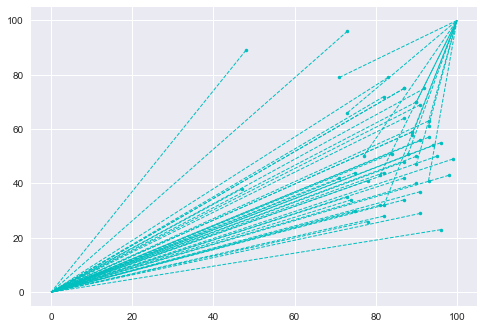

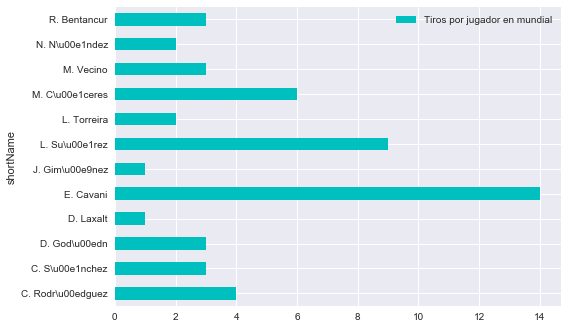

In [103]:
TeamShotsNames = TeamShots.join(playersNames.set_index('wyId'), on='playerId')

TeamShotsPositions = TeamShotsNames.positions
p1 = []
p2 = []
x1 = []
x2 = []
y1 = []
y2 = []
for i in TeamShotsPositions.values:
    p1.append(i[0])
    p2.append(i[1])
for p in p1:
    x1.append(p['x'])
    y1.append(p['y'])
for p in p2:
    x2.append(p['x'])
    y2.append(p['y']) 
    
plt.plot([x1,x2],[y1,y2],color='c',linewidth=1, linestyle='dashed', marker='.', markevery=[0])
plt.show()

tsn = TeamShotsNames.groupby('shortName').shortName.count()
tsn.plot.barh(rot=0, color='c', label='Tiros por jugador en mundial')
plt.legend()